In [1]:
import pandas as pd
titanic=pd.read_csv("/Users/macbookpro/Documents/GitHub/Machine-Learning/data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [3]:
inputs=titanic.drop('Survived',axis='columns')
target=titanic.Survived

In [4]:
inputs.Sex=inputs.Sex.map({'male':1,'female':2})

In [5]:
inputs.Age[:10] #có nghĩa nó đang truy cập vào code 'Age' của DataFrame có tên là 'inputs' và lấy ra 10 giá trị đầu tiên trong cột đó

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [6]:
inputs.Age=inputs.Age.fillna(inputs.Age.mean()) #sẽ thay thế tất cả các giá trị thiếu (NaN) trong cột 'Age' bằng giá trị trung bình mà bạn vừa tính toán
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(inputs, target, test_size=0.2);

In [8]:
X_train.shape, Y_train.shape

((712, 4), (712,))

In [9]:
X_test.shape, Y_test.shape

((179, 4), (179,))

In [10]:
from sklearn import tree
model=tree.DecisionTreeClassifier(max_depth5, min_samples_split=13)
#max_depth: độ sâu tối đa của cây quyết định, min_samples_split: số mẫu tối thiểu để chia một node

In [11]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=13)

In [12]:
test_score=model.score(X_test, Y_test)
train_score=model.score(X_train,Y_train)

print(f"Train Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")

Train Accuracy: 0.8567
Test Accuracy: 0.7486


### Kiểm tra bằng Learning curve
- Kiểm tra quá trình học bằng cách vẽ độ chính xác (hoặc lỗi) theo số lượng dữ liệu huấn luyện
- Nếu khoảng cách giữa train_score và test_score quá lớn, mô hình bị overfitting
- Nếu cả 2 đều thấp (mô hình bị underfitting)

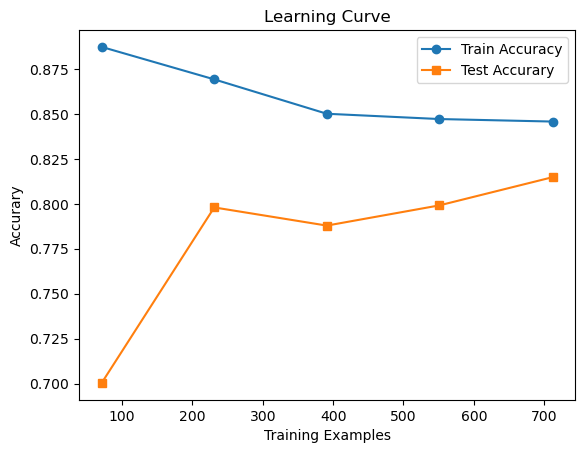

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores=learning_curve(model, inputs, target, cv=5, scoring='accuracy')

#Tính trung bình và độ lệch chuẩn
train_mean=np.mean(train_scores, axis=1)
test_mean=np.mean(test_scores, axis=1)

#Vẽ đồ thị
plt.plot(train_sizes, train_mean, label="Train Accuracy", marker='o')
plt.plot( train_sizes,test_mean, label="Test Accurary", marker='s')

plt.xlabel("Training Examples")
plt.ylabel("Accurary")
plt.title("Learning Curve")
plt.legend()
plt.show()